# Rotation of 2D Image


***

## Rotation Matix in 2D

$ \mathbf{Point} = \left( \begin{array}{cc} x  \\ y \end{array}\right)$


$ \mathbf{Rotation(\theta)} = \left( \begin{array}{cc} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{array}\right)$


$ \mathbf{Point\prime} = \left( \begin{array}{cc} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{array}\right) . \left( \begin{array}{cc} x  \\ y \end{array}\right)$

## Rotation equation for points x and y

$x\prime = x \cos\theta - y \sin\theta$

$y\prime = x \sin\theta + y \cos\theta$


***

## Algorithm
### 1. Generate a 2D array of a specific size as the image. The position is dictated by the structure of the matrix and the colour is dictated by the number at each array entry.
### 2. Convert the array into a cartesian point system with a mapping to the color in the original array, with the centre of the image being (0,0). So, the new array is: $coords = [x, y, np_x, np_y]$. Where x and y being the coordinates on a cartesian plane with (0,0) as the centre of the image, and np_x and np_y being the location of the color of that point in the original array.
### 3. Run each point through the conversion matrix for each $\theta$ and generate the $coords\prime = [x\prime, y\prime, np_x, np_y]$. This gives the new location on a cartesian plane rotated at (0,0) and maintains the same colour refference in the original array.
### 4. The colour refference is a numpy array, the $np_y$ indicates the row and $np_x$ indicates the position in that row for the colour value for the relevant point.
### 5. Display the resulting matrix on a cartesian plane as well as the original image.

***

### Importing modules

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import random

### Generate the image
Generate random image of 11 x 11 pixels of random colors. The array is 11 x 11 to allow the image to be centered on the origin of (0,0) with 5 pixels in all directions of (0,0).


[[ 62  62  62  62  62  62  62  62  62  62  62]
 [107 107 107 107 107 107 107 107 107 107 107]
 [137 137 137 137 137 137 137 137 137 137 137]
 [ 52  52  52  52  52  52  52  52  52  52  52]
 [117 117 117 117 117 117 117 117 117 117 117]
 [ 44  44  44  44  44  44  44  44  44  44  44]
 [203 203 203 203 203 203 203 203 203 203 203]
 [207 207 207 207 207 207 207 207 207 207 207]
 [250 250 250 250 250 250 250 250 250 250 250]
 [246 246 246 246 246 246 246 246 246 246 246]
 [202 202 202 202 202 202 202 202 202 202 202]
 [236 236 236 236 236 236 236 236 236 236 236]]


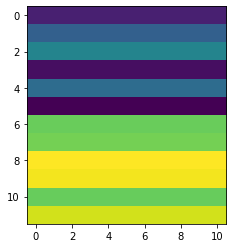

In [4]:
dimension = 11

size_array = (dimension, dimension)
x_graph_lim = (size_array[0] - 3)
y_graph_lim = (size_array[1] - 3)

int_in = random.randint(0, 255)
img_numpy = np.full((1,dimension), int_in)


for _ in range(0,dimension):
    int_in = random.randint(0, 255)
    buffer_array = np.full((1,dimension), int_in)
    img_numpy = np.concatenate((img_numpy, buffer_array))
    
print(img_numpy)

plt.imshow(img_numpy)
plt.show()

### Convert image into cartesian system

Turn numpy image into cartesian coordinates with index references to the original numpy matrix for colors.

coords = [x, y, np_x, np_y]

image array = [numpy_y, numpy_x]

colour code = img_numpy[np_y][np_x]

slicing with coords to get color code = img_numpy[coords[np_y][2]][np_x]

In [5]:
coords = []

array_y = 0
for y in range(int((size_array[0]-1)/2), int(-1*(size_array[0]+1)/2), -1):
    
    array_x = 0
    
    for x in range(int(-1*(size_array[0]-1)/2), int((size_array[0]+1)/2)):
        coords.append((x, y, array_x, array_y))
        
        array_x += 1

    array_y += 1

# Showing coords = [x, y, np_x, np_y]
print(coords)           


# Showing how the array is sliced and used to find colour refs
print(img_numpy[0][1])
print(coords[0])
print(img_numpy[coords[0][2]][1])

[(-5, 5, 0, 0), (-4, 5, 1, 0), (-3, 5, 2, 0), (-2, 5, 3, 0), (-1, 5, 4, 0), (0, 5, 5, 0), (1, 5, 6, 0), (2, 5, 7, 0), (3, 5, 8, 0), (4, 5, 9, 0), (5, 5, 10, 0), (-5, 4, 0, 1), (-4, 4, 1, 1), (-3, 4, 2, 1), (-2, 4, 3, 1), (-1, 4, 4, 1), (0, 4, 5, 1), (1, 4, 6, 1), (2, 4, 7, 1), (3, 4, 8, 1), (4, 4, 9, 1), (5, 4, 10, 1), (-5, 3, 0, 2), (-4, 3, 1, 2), (-3, 3, 2, 2), (-2, 3, 3, 2), (-1, 3, 4, 2), (0, 3, 5, 2), (1, 3, 6, 2), (2, 3, 7, 2), (3, 3, 8, 2), (4, 3, 9, 2), (5, 3, 10, 2), (-5, 2, 0, 3), (-4, 2, 1, 3), (-3, 2, 2, 3), (-2, 2, 3, 3), (-1, 2, 4, 3), (0, 2, 5, 3), (1, 2, 6, 3), (2, 2, 7, 3), (3, 2, 8, 3), (4, 2, 9, 3), (5, 2, 10, 3), (-5, 1, 0, 4), (-4, 1, 1, 4), (-3, 1, 2, 4), (-2, 1, 3, 4), (-1, 1, 4, 4), (0, 1, 5, 4), (1, 1, 6, 4), (2, 1, 7, 4), (3, 1, 8, 4), (4, 1, 9, 4), (5, 1, 10, 4), (-5, 0, 0, 5), (-4, 0, 1, 5), (-3, 0, 2, 5), (-2, 0, 3, 5), (-1, 0, 4, 5), (0, 0, 5, 5), (1, 0, 6, 5), (2, 0, 7, 5), (3, 0, 8, 5), (4, 0, 9, 5), (5, 0, 10, 5), (-5, -1, 0, 6), (-4, -1, 1, 6), (-3, -1

### Rotation function

This function takes in the point as $p = [x, y, np_x, np_y]$ and the angle as $\theta$, then splits the point into individual variables of $x, y, np_x, np_y$, and runs the $x$ and $y$ through the rotation formula to make $x\prime, y\prime$.  The function then returns $[x\prime, y\prime, np_x, np_y]$ as a tuple, note, $np_x, np_y$ remain unchanged as these are the refference point for the color of the point.

#### Rotation Formula

$x\prime = x \cos\theta - y \sin\theta$

$y\prime = x \sin\theta + y \cos\theta$

In [7]:
def point_rotation(theta, p):
    # Set origin at (0,0) and each point to rotate is (cart_x, cart_y) with the colour refs as (np_x, np_y)
    p_o = (0,0)
    cart_x, cart_y, np_x, np_y = p
    
    p = (cart_x, cart_y)
    
    # Use the x and y rotation formulas to rotate around the origin    
    p_prime = (round((p[0]*math.cos(theta)-p[1]*math.sin(theta)), 2), round((p[0]*math.sin(theta)+ p[1]*math.cos(theta)), 2))
    
    return (p_prime[0], p_prime[1], np_x, np_y)

### Graphing function

In [8]:
def graph_points_all(points_in_all):
    all_x = []
    all_y = []
    color_point = []

    for x, y, np_x, np_y in points_in_all:
        all_x.append(x)
        all_y.append(y)
        color_point.append(img_numpy[coords[np_y][2]][np_x])
    
    # Display the rotation as vectors from the origin and setup cartesian coordinates
    plt.rcParams["figure.figsize"] = (5,5)
    
    ax = plt.axes()
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    x_ticks = np.arange(-1*x_graph_lim, x_graph_lim, 1)
    y_ticks = np.arange(-1*y_graph_lim, y_graph_lim, 1)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])
    ax.set_xticks(np.arange(-1*x_graph_lim, x_graph_lim, 1), minor=True)
    ax.set_yticks(np.arange(-1*y_graph_lim, y_graph_lim, 1), minor=True)
    
    plt.ylim(-1*y_graph_lim, y_graph_lim)
    plt.xlim(-1*x_graph_lim, x_graph_lim)
        
    plt.scatter(all_x, all_y, c=color_point, s=17**2, marker='s')
    plt.show()


### Looping through angles and rotating the image

------------------------------------------
Rotation anticlockwise in degrees = 0.0


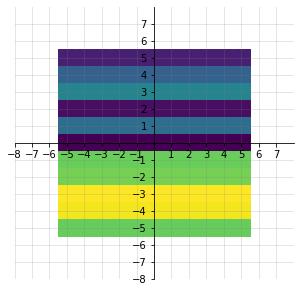

------------------------------------------
Rotation anticlockwise in degrees = 22.5


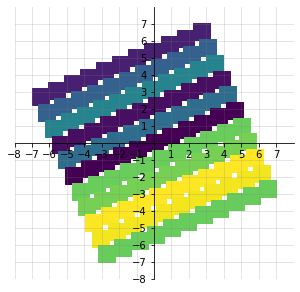

------------------------------------------
Rotation anticlockwise in degrees = 45.0


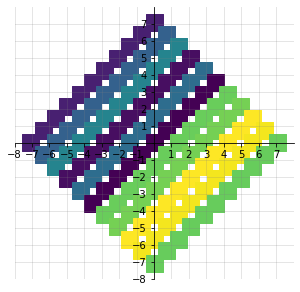

------------------------------------------
Rotation anticlockwise in degrees = 60.0


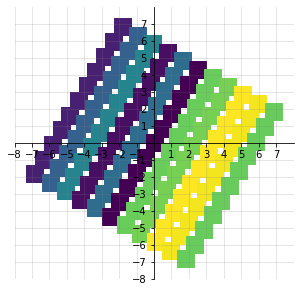

------------------------------------------
Rotation anticlockwise in degrees = 90.0


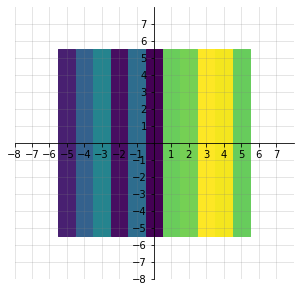

In [10]:
thetas = [0, math.pi/8, math.pi/4, math.pi/3, math.pi/2]

# Generated rotated matrix for all thetas
for theta_in in thetas:
   
    coords_prime = []
    
    print("------------------------------------------")
    print(f"Rotation anticlockwise in degrees = {round((theta_in * 180 / math.pi), 2)}")

    for item in coords:
        coords_prime.append(point_rotation(theta_in, item))
    
    graph_points_all(coords_prime)